In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 데이터를 로드해서
# train이랑 test 데이터로 나눈다
# 밑에 cell 무시

In [6]:
# 작업중인 셀
# 이미지 파일 업로드
import os
import shutil
from sklearn.utils import shuffle
from skimage.transform import resize

images = []
Labels = []
directory = 'C:/Users/zzang/Desktop/archive/img/train/'

for label, names in enumerate(os.listdir(directory)):
    try:
        for image_file in os.listdir(directory+names):
            image = plt.imread(directory+names+r'/'+image_file)
            image = resize(image, (32, 32, 3))
            images.append(image)
            Labels.append(label)
    except Exception as e:
        print(str(e))

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [ ]:
#Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [11]:
#Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

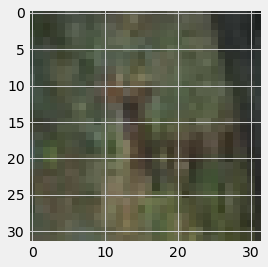

In [12]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [13]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [14]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [16]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [17]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [18]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [19]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [24]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape=(32, 32, 3)) )

#Add a pooling layer
model.add( MaxPooling2D(pool_size = (2, 2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation = 'relu') )

#Add another pooling layer
model.add( MaxPooling2D(pool_size = (2, 2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [25]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [26]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 55s 352ms/step - loss: 1.7829 - accuracy: 0.3347 - val_loss: 1.5126 - val_accuracy: 0.4517
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 1.4117 - accuracy: 0.4824 - val_loss: 1.2762 - val_accuracy: 0.5395
Epoch 3/10
157/157 [==============================] - 55s 352ms/step - loss: 1.2476 - accuracy: 0.5480 - val_loss: 1.1928 - val_accuracy: 0.5754
Epoch 4/10
157/157 [==============================] - 55s 352ms/step - loss: 1.1470 - accuracy: 0.5904 - val_loss: 1.0658 - val_accuracy: 0.6226
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 1.0476 - accuracy: 0.6280 - val_loss: 1.0295 - val_accuracy: 0.6350
Epoch 6/10
157/157 [==============================] - 55s 350ms/step - loss: 0.9839 - accuracy: 0.6520 - val_loss: 1.0182 - val_accuracy: 0.6378
Epoch 7/10
157/157 [==============================] - 55s 350ms/step - loss: 0.9167 - accuracy: 0.6746 - val_loss: 1.0136 - val_ac

In [28]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9427 - accuracy: 0.6854


0.6854000091552734

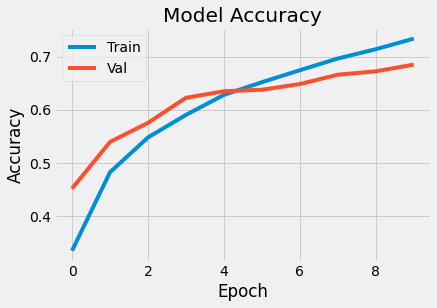

In [30]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

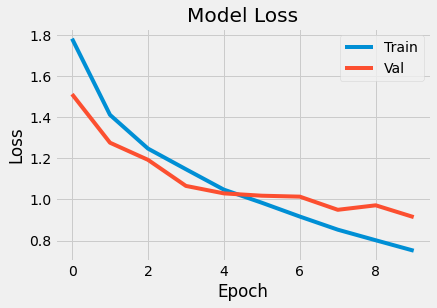

In [31]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [33]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


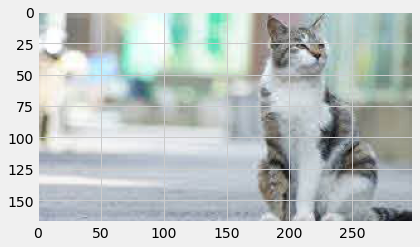

In [34]:
#Show the image
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

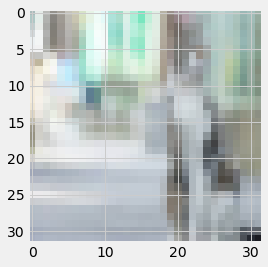

In [35]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [36]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.01504121, 0.00185105, 0.03112864, 0.5087536 , 0.02827022,
        0.38529462, 0.00381631, 0.02188709, 0.00252088, 0.00143639]],
      dtype=float32)

In [38]:
#Sort the predictions from least to greatest
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8 ,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[3, 5, 2, 4, 7, 0, 6, 8, 1, 9]


In [42]:
#Print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 50.88 %
dog : 38.53 %
bird : 3.11 %
deer : 2.83 %
horse : 2.19 %
